# Overview
Welcome to the House Price Prediction Challenge, we will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.model_selection import train_test_split
data=pd.read_csv('train.csv')
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


Here we could see that there is no null value in the dataset.

## POSTED_BY

Here we will find how the price of the house depends on the person(i.e, dealer , owner or builder) who posted the ad of selling house.

In [3]:
data.POSTED_BY.value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

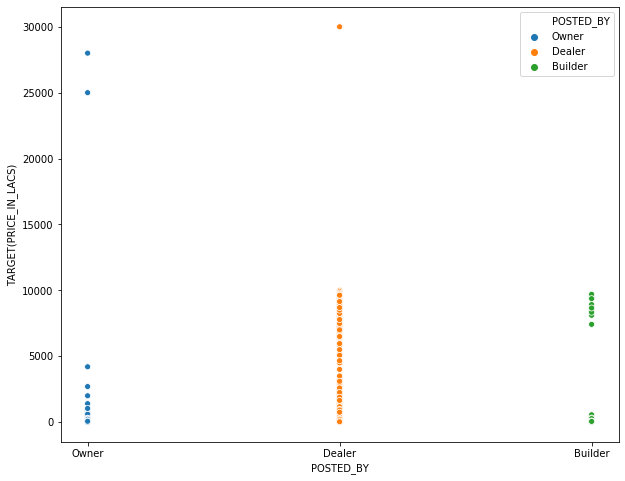

In [4]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.POSTED_BY,data['TARGET(PRICE_IN_LACS)'],hue=data.POSTED_BY)

From the above scatterplot it is quit evident that there are some outlier in the provided data

In [5]:
def remove_outliers(main_data,column):
    threshold=3
    mean=np.mean(column)
    std=np.std(column)
    for i in range(len(column)):
        z_score=(column[i]-mean)/std
        if np.abs(z_score)>threshold:
            main_data.drop(index=i,inplace=True)
    return main_data

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
13.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
2.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0


0.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
14.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
4.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
14.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-

-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
11.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
13.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
14.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
1.0


-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1

-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
1.0
-1.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.

-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
-1.0
13.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1

-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
0.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
0.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
0.

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
9.0
0.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
14.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
0.0
-1.0
0.0
-1.0
-1.0
-1.0
-1.0
-1.0
2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
-1.0
0.0
-1.0

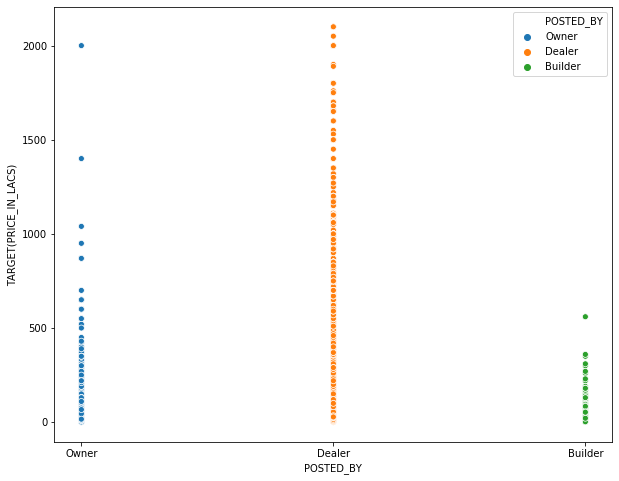

In [6]:
remove_outliers(data,data['TARGET(PRICE_IN_LACS)'])
plt.figure(figsize=(10,8))
sns.scatterplot(data.POSTED_BY,data['TARGET(PRICE_IN_LACS)'],hue=data.POSTED_BY)

Here we could observe in the provided scatterplot that the outliers are removed.
And it could be observed that the property posted by dealer costs quite higher than others

In [7]:
data.POSTED_BY=pd.Categorical(data.POSTED_BY,categories=['Owner','Builder','Dealer'],ordered=True).codes


In [8]:
price=data['TARGET(PRICE_IN_LACS)']
data.drop(['TARGET(PRICE_IN_LACS)'],axis=1,inplace=True)

## Under-Construction 

In [9]:
data.UNDER_CONSTRUCTION.value_counts()

0    24071
1     5218
Name: UNDER_CONSTRUCTION, dtype: int64

0 :- construction completed       
      1:- under construction

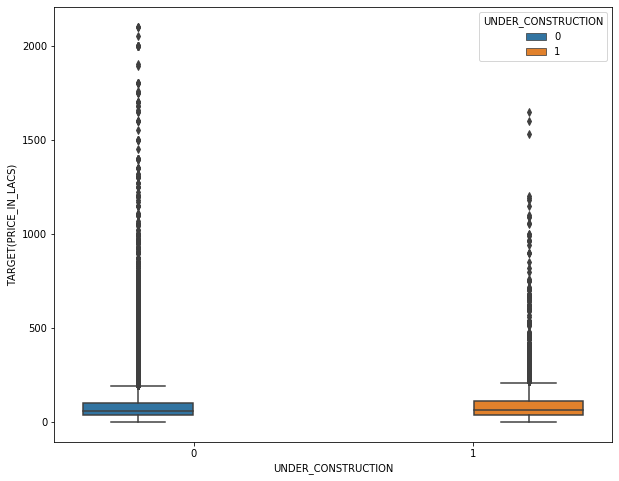

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data.UNDER_CONSTRUCTION,price,hue=data.UNDER_CONSTRUCTION)

The above box plot indicates that price of under construction houses are less than that of completely constructed houses.

##  RERA

In [11]:
data.RERA.value_counts()

0    20037
1     9252
Name: RERA, dtype: int64

0:-RERA not approved                            
1:-RERA approved

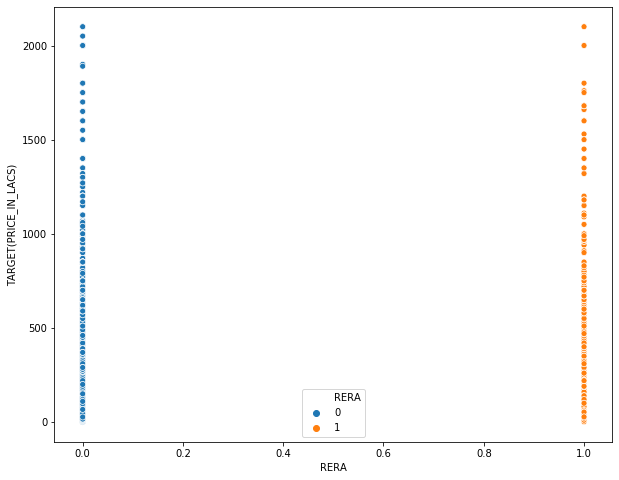

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.RERA,price,hue=data.RERA)

Here the price distribution is quit significant in both cases

## BHK_NO 

In [13]:
data['BHK_NO.'].value_counts()

2     13277
3     10472
1      3560
4      1707
5       184
6        49
8        10
7         9
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

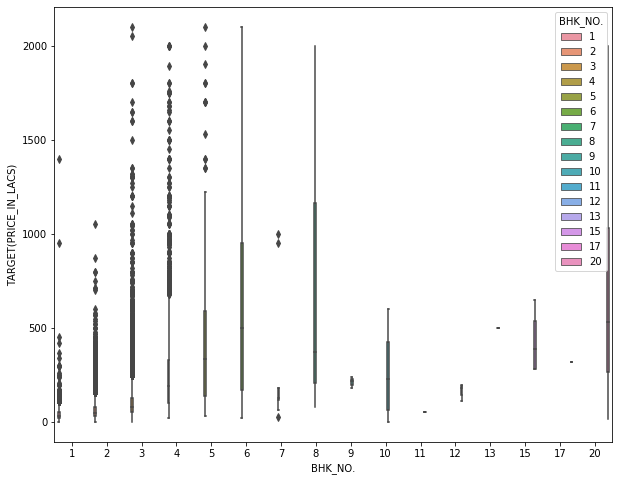

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data['BHK_NO.'],price,hue=data['BHK_NO.'])

## BHK OR RK

In [15]:
data.BHK_OR_RK.value_counts()

BHK    29265
RK        24
Name: BHK_OR_RK, dtype: int64

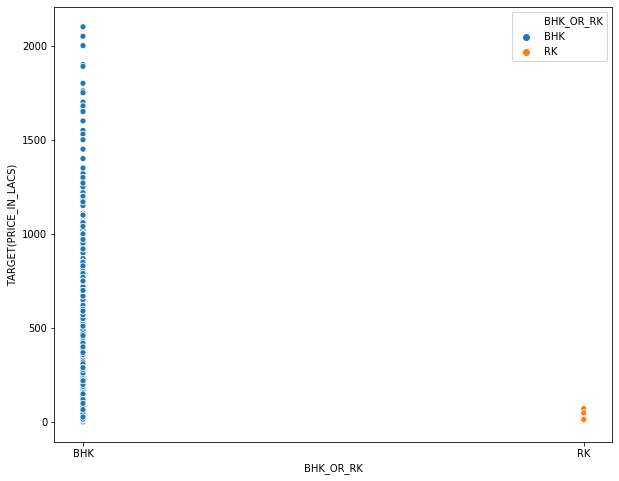

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.BHK_OR_RK,price,hue=data.BHK_OR_RK)

Assigning :        
0:- for RK           
           1:- for BHK

In [17]:
data.BHK_OR_RK=pd.Categorical(data.BHK_OR_RK,categories=['RK','BHK'],ordered=True).codes

## READY TO MOVE 

In [18]:
data.READY_TO_MOVE.value_counts()

1    24071
0     5218
Name: READY_TO_MOVE, dtype: int64

0:- no not ready to move             
1:- yes ready to move

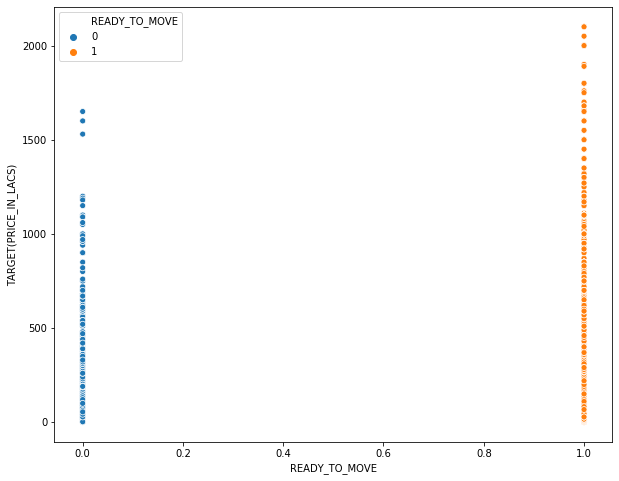

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.READY_TO_MOVE,price,hue=data.READY_TO_MOVE)

Ready to move houses costs quit large than other type.

## RESALE 

In [20]:
data.RESALE.value_counts()

1    27350
0     1939
Name: RESALE, dtype: int64

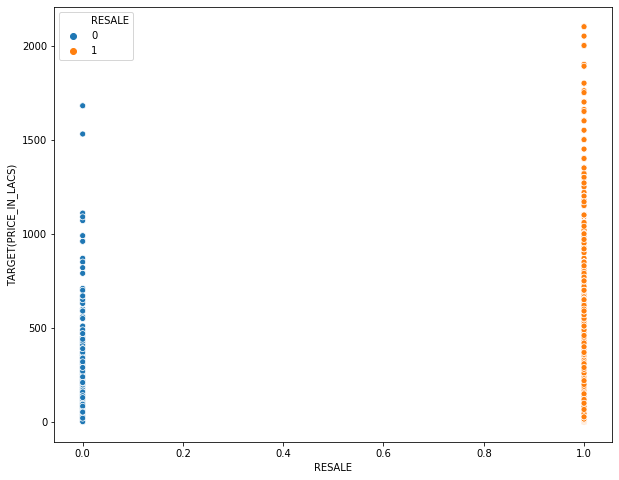

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.RESALE,price,hue=data.RESALE)

## ADDRESS 

In [22]:
data.ADDRESS.value_counts()

Zirakpur,Chandigarh                         509
Whitefield,Bangalore                        228
Raj Nagar Extension,Ghaziabad               215
Sector-137 Noida,Noida                      139
New Town,Kolkata                            130
                                           ... 
Sai Colony, Near Sai Mandir, Dighi,Pune       1
Bank Colony, Narayanapuram,Madurai            1
Varadarajapuram,Chennai                       1
Koppolu Road Beside Dreams School,Ongole      1
Vashi,Maharashtra                             1
Name: ADDRESS, Length: 6888, dtype: int64

In [23]:
data.ADDRESS=pd.Categorical(data.ADDRESS).codes

## Spliting of data 

In [24]:
train_data,test_data,train_price,test_price=train_test_split(data,price,test_size=.2)

##  DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor1=DecisionTreeRegressor(max_depth=9)
regressor1.fit(train_data,train_price)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor1.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor1.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor1.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor1.predict(test_data)))

mean_squared_log Train Error is  0.4055309683499179
mean_squared_log Test Error is  0.42628122904404436
r2_score of train data is:- 0.8536083464903035
r2_score of test data is:- 0.6498728195849752


## RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor(max_depth=12,random_state=35)
regressor2.fit(train_data,train_price)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=35, verbose=0, warm_start=False)

In [36]:
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(train_price,regressor2.predict(train_data))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(test_price,regressor2.predict(test_data))))
print('r2_score of train data is:-',r2_score(train_price,regressor2.predict(train_data)))
print('r2_score of test data is:-',r2_score(test_price,regressor2.predict(test_data)))

mean_squared_log Train Error is  0.31001849342779564
mean_squared_log Test Error is  0.3720020368209288
r2_score of train data is:- 0.9331134815769572
r2_score of test data is:- 0.7600285561020437


## Conclusion:- Thus here it is evident that the RandomForestRegressor Works quit well with r2_score on test dataset as 0.76 i.e, 76% accuracy.